# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [99]:
!pip install pandas matplotlib ipywidgets
!pip install dash
!pip install dash_ag_grid

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from dash import Dash, html
import dash_ag_grid as dag
import os

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [101]:
# Responda aqui a primeira etapa



In [102]:
df = pd.read_csv('/content/matches.csv')

In [103]:
print("Shape:", df.shape)

print("\nTipos de dados:\n", df.dtypes)

print("\nDados ausentes:\n", df.isnull().sum())

print("\nEstatísticas básicas:\n", df.describe())

print("\nInformações gerais:\n", df.info())

print("\nPrimeiras linhas do DataFrame:\n", df.head())


Shape: (1389, 28)

Tipos de dados:
 Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Dados ausentes:
 Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga     

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

In [104]:
# Responda aqui a etapa

<ipython-input-105-062f499fdaa5>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



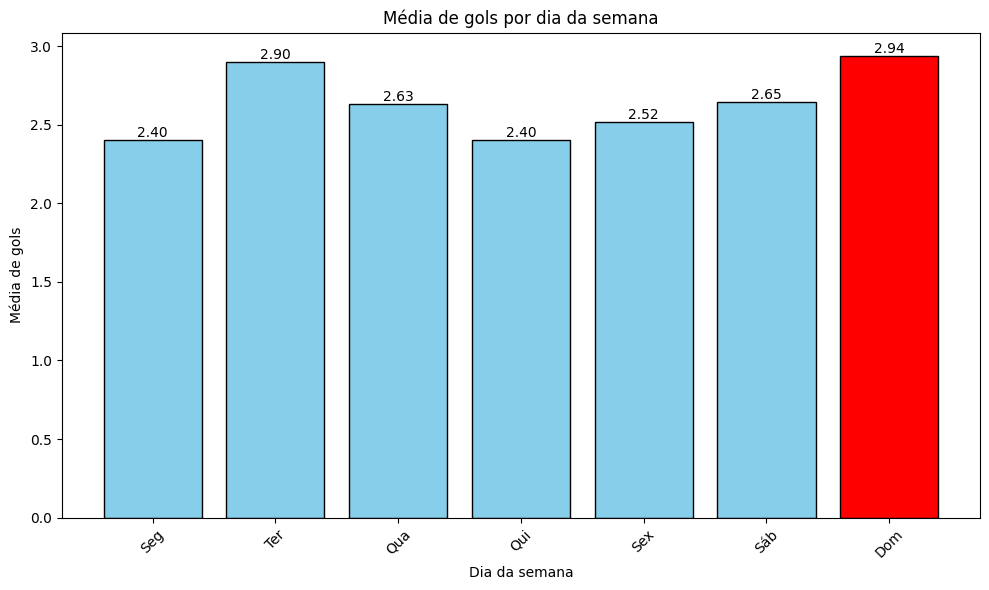

In [105]:
df['total_goals'] = df['gf'] + df['ga']
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

day_translation = {
    'Mon': 'Seg',
    'Tue': 'Ter',
    'Wed': 'Qua',
    'Thu': 'Qui',
    'Fri': 'Sex',
    'Sat': 'Sáb',
    'Sun': 'Dom'
}

df['dia'] = df['day'].map(day_translation)

goals_per_day = df.groupby('dia')['total_goals'].mean()

max_day = goals_per_day.idxmax()

colors = ['red' if day == max_day else 'skyblue' for day in goals_per_day.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(goals_per_day.index, goals_per_day, color=colors, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title('Média de gols por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Média de gols')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

In [106]:
# Responda a etapa aqui

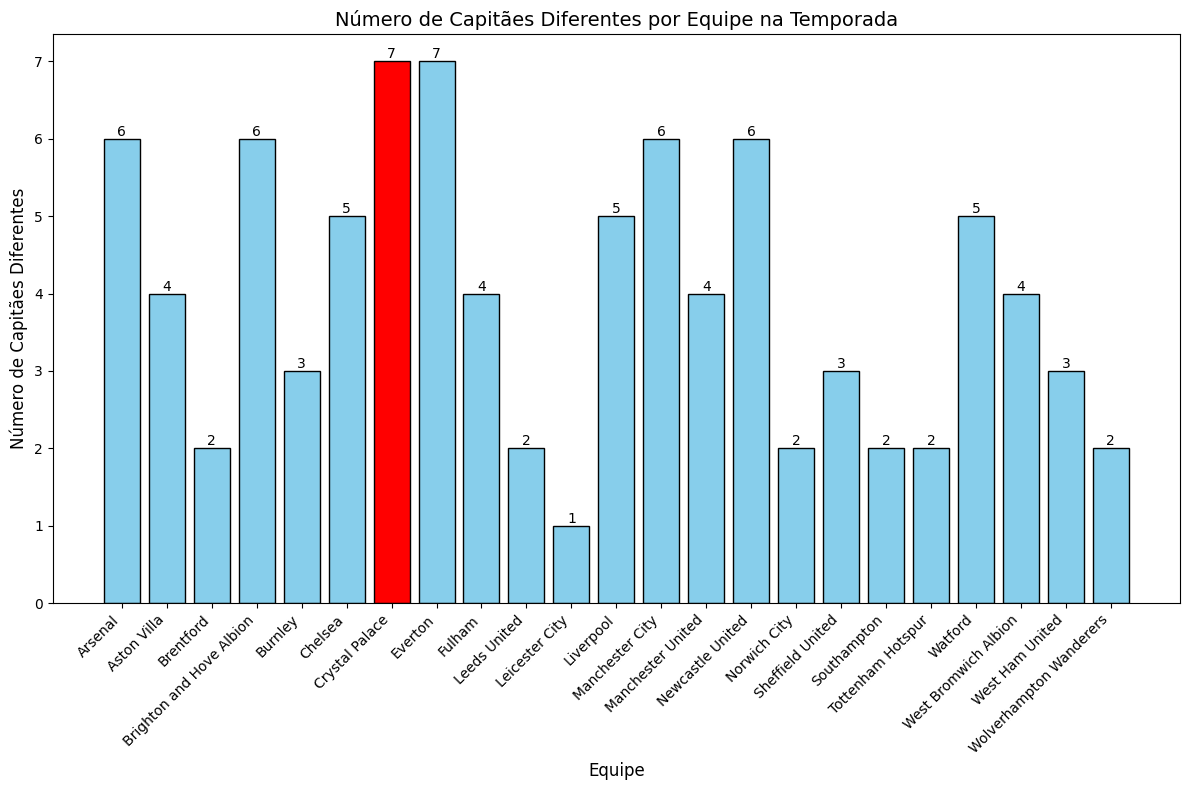

In [107]:
df_filtered = df[['team', 'captain']]

unique_captains_per_team = df_filtered.groupby('team')['captain'].nunique()

max_captains_team = unique_captains_per_team.idxmax()

colors = ['red' if team == max_captains_team else 'skyblue' for team in unique_captains_per_team.index]

plt.figure(figsize=(12, 8))
bars = plt.bar(unique_captains_per_team.index, unique_captains_per_team, color=colors, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title('Número de Capitães Diferentes por Equipe na Temporada', fontsize=14)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Número de Capitães Diferentes', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

In [108]:
# Responda a etapa aqui

In [109]:
df['result'].unique()

array(['L', 'W', 'D'], dtype=object)

In [110]:
df['team'].unique()

array(['Manchester City', 'Chelsea', 'Arsenal', 'Tottenham Hotspur',
       'Manchester United', 'West Ham United', 'Wolverhampton Wanderers',
       'Newcastle United', 'Leicester City', 'Brighton and Hove Albion',
       'Brentford', 'Southampton', 'Crystal Palace', 'Aston Villa',
       'Leeds United', 'Burnley', 'Everton', 'Watford', 'Norwich City',
       'Liverpool', 'Fulham', 'West Bromwich Albion', 'Sheffield United'],
      dtype=object)

In [111]:
def plot_formation_by_result(team):
    team_df = df[df['team'] == team]

    formation_win_counts = team_df[team_df['result'] == 'W']['formation'].value_counts()
    formation_win = formation_win_counts.idxmax()
    count_formation_win = formation_win_counts.max()

    formation_draw_counts = team_df[team_df['result'] == 'D']['formation'].value_counts()
    formation_draw = formation_draw_counts.idxmax()
    count_formation_draw = formation_draw_counts.max()

    formation_lose_counts = team_df[team_df['result'] == 'L']['formation'].value_counts()
    formation_lose = formation_lose_counts.idxmax()
    count_formation_lose = formation_lose_counts.max()

    formations = [formation_win, formation_draw, formation_lose]
    formations_count = [count_formation_win, count_formation_draw, count_formation_lose]
    results = ['Win\n' + formation_win, 'Draw\n' + formation_draw, 'Lose\n' + formation_lose]

    colors = ['green', 'yellow', 'red']

    plt.figure(figsize=(8, 6))
    bars = plt.bar(results, formations_count, color=colors, edgecolor='black')

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    plt.title(f'Formação mais comum para {team}')
    plt.xlabel('Resultado')
    plt.ylabel('Quantidade')
    plt.tight_layout()
    plt.show()

In [112]:
def on_dropdown_change(change):
    clear_output()
    display(dropdown)
    plot_formation_by_result(change.new)

dropdown = widgets.Dropdown(
    options=df['team'].unique(),
    value=df['team'].unique()[0],
    description='Choose:',
)
dropdown.observe(on_dropdown_change,names='value')
display(dropdown)

Dropdown(description='Choose:', options=('Manchester City', 'Chelsea', 'Arsenal', 'Tottenham Hotspur', 'Manche…

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

In [113]:
# Responda aqui a etapa

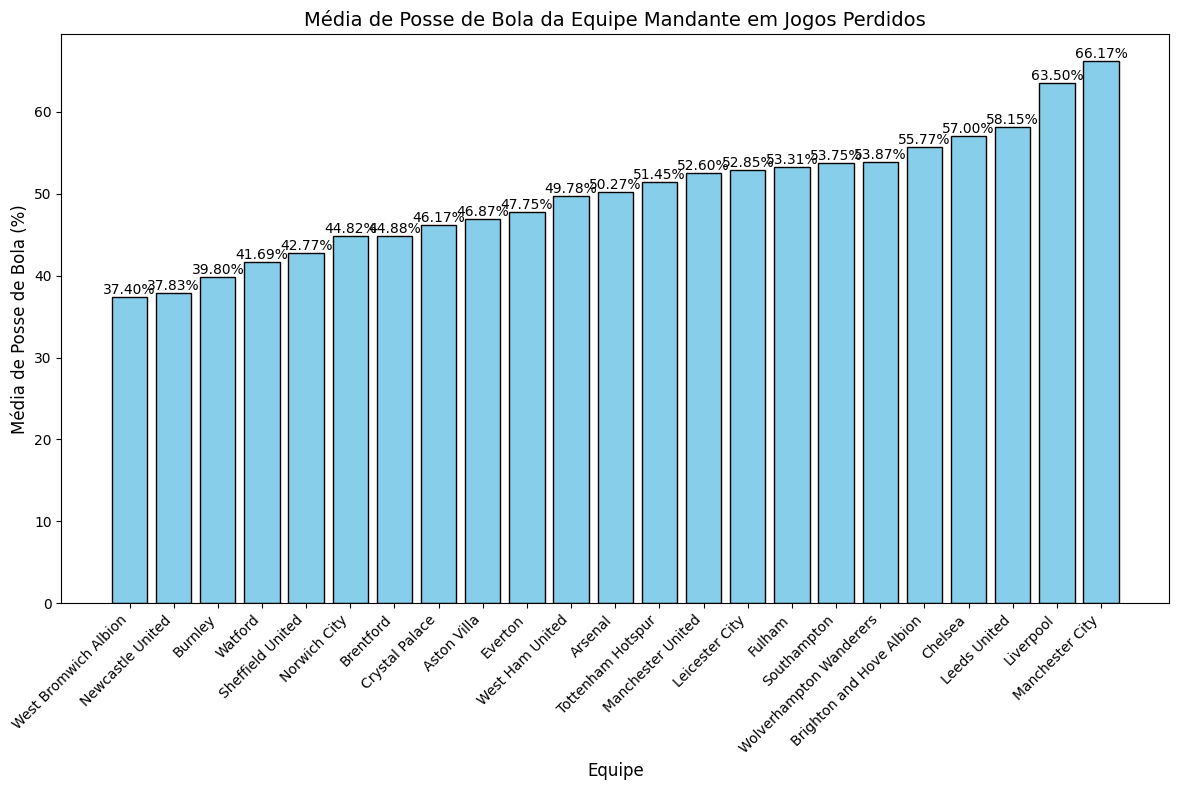

In [114]:
df_lost = df[df['result'] == 'L']
df_lost = df_lost[(df_lost['venue'] == 'Home')]

avg_possession = df_lost.groupby('team')['poss'].mean().reset_index()
avg_possession = avg_possession.sort_values(by='poss', ascending=True)

plt.figure(figsize=(12, 8))
bars = plt.bar(avg_possession['team'], avg_possession['poss'], color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=14)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Média de Posse de Bola (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [115]:
#import warnings
#warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [116]:
# Responda a etapa aqui

In [117]:
def generate_brasao(team_name):
    return f"https://logodetimes.com/times/{team_name.lower().replace(' ', '-')}-football-club/{team_name.lower().replace(' ', '-')}-football-club-256.png"

teams_data = []

for team in df['team'].unique():
  df_team = df[df['team'] == team]
  brasao = generate_brasao(team)
  df_team['points'] = df_team['result'].map({'W': 3, 'D': 1, 'L': 0})
  points = df_team['points'].sum()
  teams_data.append([team, points, brasao])

final_df = pd.DataFrame(teams_data, columns=['team', 'points', 'brasao'])
final_df = final_df.sort_values(by='points', ascending=False).reset_index(drop=True)

In [118]:

def render_table(df):
    html = '<table>'
    html += '<tr><th>Posição</th><th>Brasão</th><th>Equipe</th><th>Pontos</th></tr>'

    for index, row in final_df.iterrows():
        html += f"<tr><td>{index + 1}</td>"
        html += f"<td><img src='{row['brasao']}' width='30' height='30'></td>"
        html += f"<td>{row['team']}</td><td>{row['points']}</td></tr>"

    html += '</table>'
    return HTML(html)

render_table(df)

Posição,Brasão,Equipe,Pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [119]:
team_summary = df.groupby('team').agg(
    publico_total=('attendance', 'sum'),
    publico_medio=('attendance', 'mean')
).reset_index()

team_summary['publico_medio'] = team_summary['publico_medio'].round()

rowData = []
for _, row in team_summary.iterrows():
    team_games = df[df['team'] == row['team']].to_dict('records')
    rowData.append({
        'team': row['team'],
        'publico_total': row['publico_total'],
        'publico_medio': row['publico_medio'],
        'games': team_games
    })

app = Dash(__name__)

masterColumnDefs = [
    {
        "headerName": "Time",
        "field": "team",
        "cellRenderer": "agGroupCellRenderer",
    },
    {"headerName": "Publico médio", "field": "publico_medio"},
    {"headerName": "Público total", "field": "publico_total"},
]

detailColumnDefs = [
    {"headerName": "Dia", "field": "date"},
    {"headerName": "Oponente", "field": "opponent"},
    {"headerName": "Local", "field": "venue"},
    {"headerName": "Público", "field": "attendance"},
]

app.layout = html.Div(
    [
        dag.AgGrid(
            id="team-game-attendance",
            enableEnterpriseModules=True,
            columnDefs=masterColumnDefs,
            rowData=rowData,
            columnSize="sizeToFit",
            masterDetail=True,
            detailCellRendererParams={
                "detailGridOptions": {
                    "columnDefs": detailColumnDefs,
                },
                "detailColName": "games",
                "suppressCallback": True,
            },
            dashGridOptions={"detailRowAutoHeight": True, "animateRows": False},
        ),
    ]
)

if __name__ == "__main__":
    app.run(debug=True)

<IPython.core.display.Javascript object>